## 1. 图像ROI与ROI操作
解释：图像的ROI(region of interest)是指图像中感兴趣区域，在OpenCV中图像设置图像ROI区域，实现只对ROI区域操作。

**矩形ROI区域提取**

**矩形ROI区域copy**



In [1]:
import cv2 as cv
import numpy as np
src = cv.imread("D:/Our Home/Python/OpenCV/image/rabbits.jpg")
h, w = src.shape[:2]

# 获取ROI
cx, cy = h // 2, w // 2
roi = src[cx - 100: cx + 100, cy - 100: cy + 100, :]
cv.imshow("roi", roi)

# copy ROI
image = np.copy(roi)

# modify ROI
roi[:, :, 0] = 0
cv.imshow("result", src)

# modify copy ROI
image[:, :, 2] = 0
cv.imshow("result", src)
cv.imshow("copy-roi", image)


cv.waitKey(0)
cv.destroyAllWindows()

**不规则ROI区域**

- ROI区域mask生成

- 像素位and操作

- 提取到roi区域

- 加背景or操作

- add背景与ROI区域

In [11]:
import cv2 as cv
import numpy as np
src = cv.imread("D:/Our Home/Python/OpenCV/image/rabbits.jpg")

# example with ROI - generate mask
hsv = cv.cvtColor(src, cv.COLOR_BGR2HSV)
mask = cv.inRange(hsv, (26, 43, 46), (99, 255, 255))
#cv.imshow("mask", mask)

# extract person ROI
mask = cv.bitwise_not(mask)
person = cv.bitwise_and(src, src, mask = mask)
#cv.imshow("person", person)

# generate background
result = np.zeros(src.shape, src.dtype)
result[:, :, 0] = 255

# combine background + person
mask = cv.bitwise_not(mask)
dst = cv.bitwise_or(person, result, mask = mask)
dst = cv.add(dst, person)
cv.imshow("dst", dst)
cv.waitKey(0)
cv.destroyAllWindows()

## 2. 图像直方图
>图像直方图是图像像素值的统计学特征、计算代价较小，具有**图像平移、旋转、缩放不变性**等众多优点，广泛地应用于图像处理的各个领域，特别是灰度图像的阈值分割、基于颜色的图像检索以及图像分类、反向投影跟踪。

常见的分为:
- 灰度直方图
- 颜色直方图

Bins是指直方图的大小范围， 对于像素值取值在0～255之间的，最少有256个bin，此外还可以有16、32、48、128等，256除以bin的大小应该是整数倍。
>**API**

```
# 图像，通道[0]-灰度图，掩膜-无，灰度级，像素范围
cv.calcHist([image], [i], None, [256], [0, 256])
```

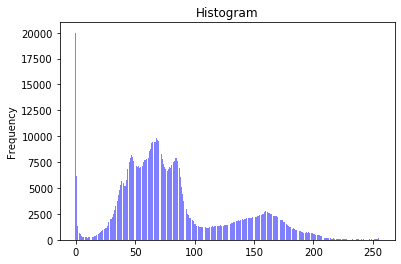

In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
src = cv.imread("D:/Our Home/Python/OpenCV/image/rabbits.jpg")
src_gray = cv.cvtColor(src, cv.COLOR_RGB2GRAY)

# 定义灰度直方图
def custom_hist(gray):
    h, w = gray.shape
    hist = np.zeros([256], dtype = np.int32)
    for row in range(h):
        for col in range(w):
            hist[gray[row, col]] += 1
    
    y_pos = np.arange(0, 256, 1, dtype = np.int32)
    plt.bar(y_pos, hist, align = 'center', color = 'b', alpha = 0.5)
    plt.ylabel('Frequency')
    plt.title('Histogram')
    plt.show()
custom_hist(src_gray)

cv.waitKey(0)
cv.destroyAllWindows()

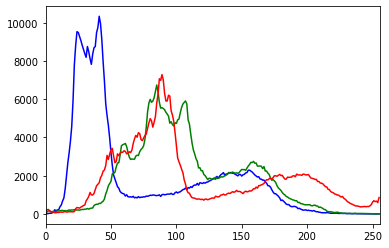

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
src = cv.imread("D:/Our Home/Python/OpenCV/image/rabbits.jpg")
# 定义彩色直方图
def image_hist(image):
    cv.imshow("input", image)
    color = ('blue', 'green', 'red')
    for i, color in enumerate(color):
        # 图像，通道[0]-灰度图，掩膜-无，灰度级，像素范围
        hist = cv.calcHist([image], [i], None, [256], [0, 256])
        plt.plot(hist, color=color)
        plt.xlim([0, 256])
    #plt.show()
image_hist(src)
cv.waitKey(0)
cv.destroyAllWindows()

## 3. 图像直方图均衡化
>图像直方图均衡化可以用于**图像增强**、对输入图像进行直方图均衡化处理，提升后续对象检测的准确率在OpenCV人脸检测的代码演示中已经很常见。此外对医学影像图像与卫星遥感图像也经常通过直方图均衡化来提升图像质量。

<img src ="./image/equalizeHist.png">


>**API**
```Python
equalizeHist(src, dst)
```

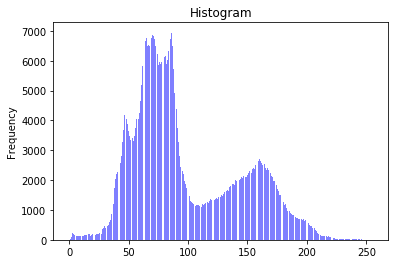

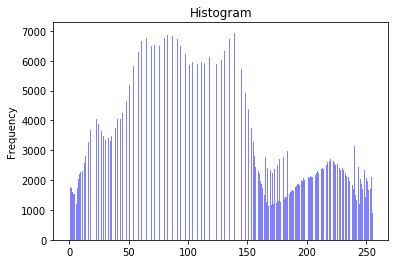

In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

# 定义灰度直方图
def custom_hist(gray):
    h, w = gray.shape
    hist = np.zeros([256], dtype = np.int32)
    for row in range(h):
        for col in range(w):
            hist[gray[row, col]] += 1
    
    y_pos = np.arange(0, 256, 1, dtype = np.int32)
    plt.bar(y_pos, hist, align = 'center', color = 'b', alpha = 0.5)
    plt.ylabel('Frequency')
    plt.title('Histogram')
    plt.show()

src = cv.imread("D:/Our Home/Python/OpenCV/image/rabbits.jpg")
src_gray = cv.cvtColor(src, cv.COLOR_RGB2GRAY)

# 直方图均衡化
dst = cv.equalizeHist(src_gray)
cv.imshow("eh", dst)
# 看原图和均衡化后的图的直方图会不会不一样(答案当然是会)
custom_hist(src_gray)
custom_hist(dst)

cv.waitKey(0)
cv.destroyAllWindows()

## 4. 图像直方图比较
>图像直方图比较，就是计算两幅图像的直方图数据，比较两组数据的相似性，从而得到两幅图像之间的相似程度，直方图比较在早期的CBIR中是应用很常见的技术手段，通常会结合边缘处理、词袋等技术一起使用。

>相关性计算

**相关系数:** $d\left(H_{1}, H_{2}\right)=\frac{\sum_{I}\left(H_{1}(I)-\bar{H}_{1}\right)\left(H_{2}(I)-\bar{H}_{2}\right)}{\sqrt{\sum_{I}\left(H_{1}(I)-\bar{H}_{1}\right)^{2} \sum_{I}\left(H_{2}(I)-\bar{H}_{2}\right)^{2}}}$， 其中 $\quad \bar{H}_{k}=\frac{1}{N} \sum_{J} H_{k}(J)$

**卡方(Chi-Square):** $d\left(H_{1}, H_{2}\right)=\sum_{I} \frac{\left(H_{1}(I)-H_{2}(I)\right)^{2}}{H_{1}(I)}$

**交叉(Intersection):** $d\left(H_{1}, H_{2}\right)=\sum_{I} \min \left(H_{1}(I), H_{2}(I)\right)$

**巴氏距离(Bhattacharyya Distance):** $d\left(H_{1}, H_{2}\right)=\sqrt{1-\frac{1}{\sqrt{H_{1} H_{2} N^{2}}} \sum_{I} \sqrt{H_{1}(I) \cdot H_{2}(I)}}$

取相关系数或者巴氏距离，比较准确

>**API**
```Python
retval = cv.compareHist(H1, H2, method)
```

In [10]:
import cv2 as cv

src1 = cv.imread("./image/pic1.png")
src2 = cv.imread("./image/pic2.png")
src3 = cv.imread("./image/pic3.png")
src4 = cv.imread("./image/test.png")

# 转换成HSV
hsv1 = cv.cvtColor(src1, cv.COLOR_BGR2HSV)
hsv2 = cv.cvtColor(src2, cv.COLOR_BGR2HSV)
hsv3 = cv.cvtColor(src3, cv.COLOR_BGR2HSV)
hsv4 = cv.cvtColor(src4, cv.COLOR_BGR2HSV)
# OpenCV使用的H值在0-180之间
hist1 = cv.calcHist([hsv1], [0, 1], None, [60, 64], [0, 180, 0, 256])
hist2 = cv.calcHist([hsv2], [0, 1], None, [60, 64], [0, 180, 0, 256])
hist3 = cv.calcHist([hsv3], [0, 1], None, [60, 64], [0, 180, 0, 256])
hist4 = cv.calcHist([hsv4], [0, 1], None, [60, 64], [0, 180, 0, 256])
print(hist1.dtype)

# 对比前进行归一化
cv.normalize(hist1, hist1, 0, 1.0, cv.NORM_MINMAX)
cv.normalize(hist2, hist2, 0, 1.0, cv.NORM_MINMAX)
cv.normalize(hist3, hist3, 0, 1.0, cv.NORM_MINMAX)
cv.normalize(hist4, hist4, 0, 1.0, cv.NORM_MINMAX)

methods = [cv.HISTCMP_CORREL, cv.HISTCMP_CHISQR,
           cv.HISTCMP_INTERSECT, cv.HISTCMP_BHATTACHARYYA]
str_method = ""
for method in methods:
    src1_src2 = cv.compareHist(hist1, hist2, method)
    src3_src4 = cv.compareHist(hist3, hist4, method)
    if method == cv.HISTCMP_CORREL:
        str_method = "Correlation"
    if method == cv.HISTCMP_CHISQR:
        str_method = "Chi-square"
    if method == cv.HISTCMP_INTERSECT:
        str_method = "Intersection"
    if method == cv.HISTCMP_BHATTACHARYYA:
        str_method = "Bhattacharyya"

    print("%s src1_src2 = %.2f, src3_src4 = %.2f"%(str_method, src1_src2, src3_src4))

float32
Correlation src1_src2 = 0.73, src3_src4 = 1.00
Chi-square src1_src2 = 7215.32, src3_src4 = 0.28
Intersection src1_src2 = 1.01, src3_src4 = 1.00
Bhattacharyya src1_src2 = 0.84, src3_src4 = 0.34


## 4. 图像直方图反向投影
>图像直方图反向投影是通过构建指定模板图像的二维直方图空间与目标的二维直方图空间，进行直方图数据归一化之后， 进行比率操作，对所有得到非零数值，生成查找表对原图像进行像素映射之后，再进行图像模糊输出的结果。

>之所以叫直方图反向投影是因为它可得到直方图并将其投影到一副图像上，其结果是概率，即每个像素属于起初那副生成直方图的图像的概率。因此，calcBackProject给出的是一个概率估计：一副图像等于或类似与模型图像（产生原始直方图的图像）的概率。

>直方图反向投影流程：
- 计算直方图
- 计算比率R
- LUT查找表
- 卷积模糊
- 归一化输出

>**API**
```Python
calcBackProject
```

In [11]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

def back_projection_demo():
    sample = cv.imread("./image/rabbits_sample.jpg")
    #hist2d_demo(sample)
    target = cv.imread("./image/rabbits.jpg")
    #hist2d_demo(target)
    # BGR转HSV
    roi_hsv = cv.cvtColor(sample, cv.COLOR_BGR2HSV)
    target_hsv = cv.cvtColor(target, cv.COLOR_BGR2HSV)
    # show images
    #cv.imshow("sample", roi_hsv)
    #cv.imshow("target", target_hsv)
    
    # 图像，通道[0, 1]-HS图，掩膜-无，灰度级，像素范围
    roiHist = cv.calcHist([roi_hsv], [0, 1], None, [72, 72], [0, 180, 0, 255])
    cv.normalize(roiHist, roiHist, 0, 255, cv.NORM_MINMAX)
    dst = cv.calcBackProject([target_hsv], [0, 1], roiHist, [0, 180, 0, 255], 1)
    cv.imshow("backProjectionDemo", dst)
    
def hist2d_demo(image):
    hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)
    hist = cv.calcHist([hsv], [0, 1], None, [72, 72], [0, 180, 0, 255])
    dst = cv.resize(hist, (400, 400))
    cv.imshow("image", image)
    cv.imshow("hist", dst)
    plt.imshow(hist, interpolation='nearest')
    plt.title("2D Histogram")
    plt.show()

In [12]:
back_projection_demo()
#sample = cv.imread("./image/pic1.png")
#hist2d_demo(sample)
cv.waitKey(0)
cv.destroyAllWindows()
